In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Load some data

In [3]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/county_election_data_2000-2020.csv'
election_df = pd.read_csv(url,dtype={'FIPS':str})
election_df.head()

,FIPS,gop_2000_votes,dem_2000_votes,totalvotes_2000,gop_2000_prc,dem_2000_prc,gop_minus_dem_prc_2000,gop_2004_votes,dem_2004_votes,totalvotes_2004,...,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,gop_2020_votes,dem_2020_votes,totalvotes_2020,gop_2020_prc,dem_2020_prc,gop_minus_dem_prc_2020
0,01001,11993.0,4942.0,17208.0,69.69,28.72,40.97,15196.0,4758.0,20081.0,...,24973.0,72.77,23.77,49.00,19838.0,7503.0,27770.0,71.44,27.02,44.42
1,01003,40872.0,13997.0,56480.0,72.37,24.78,47.59,52971.0,15599.0,69320.0,...,95215.0,76.55,19.39,57.16,83544.0,24578.0,109679.0,76.17,22.41,53.76
2,01005,5096.0,5188.0,10395.0,49.02,49.91,-0.89,5899.0,4832.0,10777.0,...,10469.0,52.10,46.53,5.57,5622.0,4816.0,10518.0,53.45,45.79,7.66
3,01007,4273.0,2710.0,7101.0,60.17,38.16,22.01,5472.0,2089.0,7600.0,...,8819.0,76.40,21.25,55.15,7525.0,1986.0,9595.0,78.43,20.70,57.73
4,01009,12667.0,4977.0,17973.0,70.48,27.69,42.79,17386.0,3938.0,21504.0,...,25588.0,89.33,8.43,80.90,24711.0,2640.0,27588.0,89.57,9.57,80.00


In [5]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/county_health_rankings/chr_2019.csv'
health_df = pd.read_csv(url,dtype={'FIPS':str})
health_df.head()

,FIPS,State,County,Premature death - Years of Potential Life Lost Rate,Premature death - YPLL Rate (Black),Premature death - YPLL Rate (Hispanic),Premature death - YPLL Rate (White),Poor or fair health - % Fair/Poor,Poor physical health days - Physically Unhealthy Days,Poor mental health days - Mentally Unhealthy Days,...,Demographics - % Native Hawaiian/Other Pacific Islander,Demographics - # Hispanic,Demographics - % Hispanic,Demographics - # Non-Hispanic White,Demographics - % Non-Hispanic White,Demographics - # Not Proficient in English,Demographics - % Not Proficient in English,Demographics - % Female,Demographics - # Rural,Demographics - % Rural
0,01001,Alabama,Autauga,8824.057123,10471.252986,NaN,8706.658832,18.411124,4.200578,4.306739,...,0.104497,1586,2.857452,41336,74.473912,430,0.828548,51.342246,22921.0,42.002162
1,01003,Alabama,Baldwin,7224.632160,10042.472874,3086.605695,7277.780727,18.060458,4.098748,4.249649,...,0.068665,9675,4.550200,176582,83.047388,872,0.454512,51.452772,77060.0,42.279099
2,01005,Alabama,Barbour,9586.165037,11332.562909,NaN,7309.636719,25.773416,5.067438,4.634994,...,0.185991,1063,4.206569,11613,45.955679,297,1.199273,47.229917,18613.0,67.789635
3,01007,Alabama,Bibb,11783.543675,14812.539280,NaN,11327.563749,19.996912,4.363377,4.315710,...,0.114699,598,2.638080,16842,74.298571,84,0.394348,46.453150,15663.0,68.352607
4,01009,Alabama,Blount,10908.101822,NaN,5619.645186,11336.046321,21.095323,4.512753,4.701599,...,0.117215,5549,9.565097,50439,86.944306,1013,1.870004,50.688639,51562.0,89.951502


In [6]:
df = health_df.merge(election_df,how='left',on='FIPS')
df.head()

,FIPS,State,County,Premature death - Years of Potential Life Lost Rate,Premature death - YPLL Rate (Black),Premature death - YPLL Rate (Hispanic),Premature death - YPLL Rate (White),Poor or fair health - % Fair/Poor,Poor physical health days - Physically Unhealthy Days,Poor mental health days - Mentally Unhealthy Days,...,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,gop_2020_votes,dem_2020_votes,totalvotes_2020,gop_2020_prc,dem_2020_prc,gop_minus_dem_prc_2020
0,01001,Alabama,Autauga,8824.057123,10471.252986,NaN,8706.658832,18.411124,4.200578,4.306739,...,24973.0,72.77,23.77,49.00,19838.0,7503.0,27770.0,71.44,27.02,44.42
1,01003,Alabama,Baldwin,7224.632160,10042.472874,3086.605695,7277.780727,18.060458,4.098748,4.249649,...,95215.0,76.55,19.39,57.16,83544.0,24578.0,109679.0,76.17,22.41,53.76
2,01005,Alabama,Barbour,9586.165037,11332.562909,NaN,7309.636719,25.773416,5.067438,4.634994,...,10469.0,52.10,46.53,5.57,5622.0,4816.0,10518.0,53.45,45.79,7.66
3,01007,Alabama,Bibb,11783.543675,14812.539280,NaN,11327.563749,19.996912,4.363377,4.315710,...,8819.0,76.40,21.25,55.15,7525.0,1986.0,9595.0,78.43,20.70,57.73
4,01009,Alabama,Blount,10908.101822,NaN,5619.645186,11336.046321,21.095323,4.512753,4.701599,...,25588.0,89.33,8.43,80.90,24711.0,2640.0,27588.0,89.57,9.57,80.00


In [7]:
print(df.columns.values)

['FIPS' 'State' 'County'
 'Premature death - Years of Potential Life Lost Rate'
 'Premature death - YPLL Rate (Black)'
 'Premature death - YPLL Rate (Hispanic)'
 'Premature death - YPLL Rate (White)' 'Poor or fair health - % Fair/Poor'
 'Poor physical health days - Physically Unhealthy Days'
 'Poor mental health days - Mentally Unhealthy Days'
 'Low birthweight - Unreliable' 'Low birthweight - % LBW'
 'Low birthweight - % LBW (Black)' 'Low birthweight - % LBW (Hispanic)'
 'Low birthweight - % LBW (White)' 'Adult smoking - % Smokers'
 'Adult obesity - % Obese'
 'Food environment index - Food Environment Index'
 'Physical inactivity - % Physically Inactive'
 'Access to exercise opportunities - % With Access'
 'Excessive drinking - % Excessive Drinking'
 'Alcohol-impaired driving deaths - # Alcohol-Impaired Driving Deaths'
 'Alcohol-impaired driving deaths - # Driving Deaths'
 'Alcohol-impaired driving deaths - % Alcohol-Impaired'
 'Sexually transmitted infections - # Chlamydia Cases'
 'S

# Running Regressions

### Scatterplots and Best-Fit Lines with Seaborn

C:\Anaconda3\envs\analysis_in_gis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income inequality - Income Ratio', ylabel='gop_minus_dem_prc_2020'>

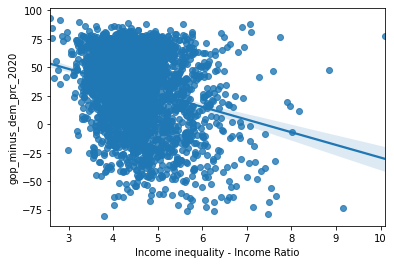

In [8]:
# An easy first step is to look at scatterplots and linear best fit lines using Seaborn

x = 'Income inequality - Income Ratio'
y = 'gop_minus_dem_prc_2020'
seaborn.regplot(x,y,data=df)

### Correlations with scipy.stats

In [9]:
# A good follow up is to run a simple correlation using scipy.stats

stats.pearsonr(df[x],df[y])

ValueError: array must not contain infs or NaNs

### Handling NaN (missing) values for correlation analysis

In [10]:
# Unfortunately, this kind of error is common.  You must be quite specific about how you handle missing values!

# One easy way to handle this is to create a second (temporary) dataframe, and then use pandas to drop missing values.
# You don't necessarily want to drop ANY row in the main dataset that's missing a value, just for this bit of analysis.

x = 'Income inequality - Income Ratio'
y = 'gop_minus_dem_prc_2020'

_df = df.loc[:,[x,y]]
_df = _df.dropna(how='any')
r, p = stats.pearsonr(_df[x],_df[y])
print('r:',r,'p:',p)

r: -0.25820989367365477 p: 1.3019422136439922e-48


#### Running Regressions with Statsmodels

In [12]:
# The Patsy formula language can be a little sensitive to spaces in filenames, so we'll again build a 
# temporary dataframe like so:
x = 'Income inequality - Income Ratio'
y = 'gop_minus_dem_prc_2020'
_df = pd.DataFrame()
_df['x'] = df.loc[:,x]
_df['y'] = df.loc[:,y]
_df = _df.dropna(how='any')
_df.head()

# Then run the regression
results = smf.ols(formula='y ~ x',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.30e-48
Time:                        11:54:48   Log-Likelihood:                -15106.
No. Observations:                3114   AIC:                         3.022e+04
Df Residuals:                    3112   BIC:                         3.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.9721      3.416     23.998      0.0

## A second example: Sleep and Motor Vehicle Crashes

C:\Anaconda3\envs\analysis_in_gis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insufficient sleep - % Insufficient Sleep', ylabel='Motor vehicle crash deaths - MV Mortality Rate'>

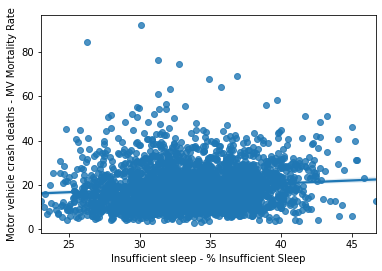

In [13]:
x = 'Insufficient sleep - % Insufficient Sleep'
y = 'Motor vehicle crash deaths - MV Mortality Rate'
seaborn.regplot(x,y,data=df)

In [14]:
x = 'Insufficient sleep - % Insufficient Sleep'
y = 'Motor vehicle crash deaths - MV Mortality Rate'
_df = pd.DataFrame()
_df['x'] = df.loc[:,x]
_df['y'] = df.loc[:,y]
_df = _df.dropna(how='any')

# Then run the regression
results = smf.ols(formula='y ~ x',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     33.74
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           7.02e-09
Time:                        11:55:04   Log-Likelihood:                -9872.6
No. Observations:                2700   AIC:                         1.975e+04
Df Residuals:                    2698   BIC:                         1.976e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0623      1.544      6.518      0.0

# Multiple Regression

Often times, we want to run an analysis using more than one explanatory (independent) variable, 
as we know that the effects can have multiple, interrelated causes.

Election preferences, for example, are related to a large number of underlying variables.

In [15]:
x0 = 'Demographics - % Rural'
x1 = 'Demographics - % 65 and over'
x2 = 'Some college - % Some College'

y = 'gop_minus_dem_prc_2020'


_df = pd.DataFrame()
_df['x0'] = df.loc[:,x0]
_df['x1'] = df.loc[:,x1]
_df['x2'] = df.loc[:,x2]
_df['y'] = df.loc[:,y]
_df = _df.dropna(how='any')

# Then run the regression
results = smf.ols(formula='y ~ x0 + x1 + x2',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     408.0
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          1.77e-223
Time:                        11:55:12   Log-Likelihood:                -14686.
No. Observations:                3113   AIC:                         2.938e+04
Df Residuals:                    3109   BIC:                         2.940e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.1920      3.371      5.989      0.0

### Moderling Interaction Between Variables

In [16]:
# Then run the regression
results = smf.ols(formula='y ~ x0*x1*x2',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          1.50e-258
Time:                        11:55:16   Log-Likelihood:                -14593.
No. Observations:                3113   AIC:                         2.920e+04
Df Residuals:                    3105   BIC:                         2.925e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.5571     20.051      3.718      0.0

In [17]:
# Then run the regression
results = smf.ols(formula='y ~ x0 + x1 + x2 + x0:x2 + x1:x2',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     289.5
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          8.28e-255
Time:                        11:55:19   Log-Likelihood:                -14608.
No. Observations:                3113   AIC:                         2.923e+04
Df Residuals:                    3107   BIC:                         2.926e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.6419      9.940      7.912      0.0